# 1. Logistic Regression

In this lab, we will be implementing Logistic Regression using Scikit-Learn. We will be using Breast Cancer dataset that contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

### 1.1 Input Data

Importing standard modules and the dataset.

In [1]:
# Import the standard modules to be used in this lab
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

The dataset is available in sklearn. So we have to import the dataset into IPython and store it in a variable called cancer.

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

Let's explore the dataset to get some insight. The object is a dictionary (data structure), thus we can explore the keys of this dictionary.

In [3]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


The keys allow us to access the data in the dictionary. <br>
We may use the describe and infor methods to understand the dataset.

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

We can display the feature names and the shape of the data.

In [5]:
print(cancer.feature_names)
print(cancer.data.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)


Now let's convert ```cancer.data``` into Pandas DataFrame.

In [6]:
cancer_pd = pd.DataFrame(cancer.data)
cancer_pd.columns = cancer.feature_names
cancer_pd['target'] = cancer.target
cancer_pd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


As we can see there are 30 columns and 1 target variable.

Let's plot a few features to observe their distribution. As we can see, a linear classifier will not be able to perfectly separate the data points.

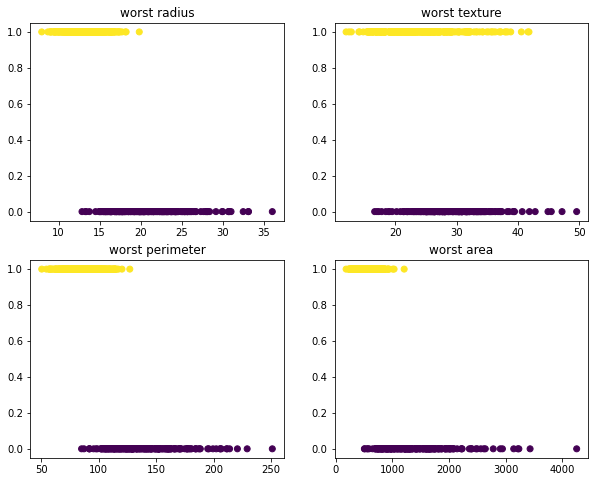

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

cols = cancer_pd.columns[20:24]
figs, axes = plt.subplots(2,2,figsize=(10,8))
axes = axes.ravel()
for p in range(0,4):
    axes[p].scatter(cancer_pd[cols[p]], cancer_pd['target'], c=cancer_pd['target'])
    axes[p].set_title(cols[p])

Here we plot feature ```mean radius``` against ```mean compactness```.

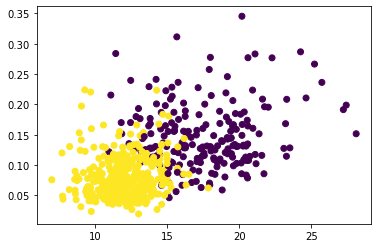

In [8]:
plt.scatter(cancer_pd['mean radius'], cancer_pd['mean compactness'], c=cancer_pd['target'])

Let's build a predictive model to classify the dataset. We use two features only to predict the target variable. We split the dataset into training and test sets. A validation set is not created since we are building only one model.

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
y = cancer_pd['target'].values
X = cancer_pd[['mean radius', 'mean compactness']]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
print(X_train.shape)

(426, 2)


### 1.2 Logistic Regression

Let's build a logistic regression model to classify the dataset. A logistic regression classifier can be built using the same SDGClassifier module. We need to specify the following parameters:
- loss : function is set to 'log'
- eta0 : the value of learning rate. It is set to an approriate value.
- learning_rate : it is set to 'constant'
- penalty : set to 'None'
- max_iter : it is the maximum number of epochs

We can also build a perceptron classifier using ```LogisticRegression``` module: ```import sklearn.linear_model.LogisticRegression```. However this Logistic Regression module does not use Gradient Descent to estimate the paramters.

In [10]:
from sklearn.linear_model import SGDClassifier
model_logr = SGDClassifier(loss='log', eta0=0.01, learning_rate='constant', penalty=None, max_iter=200, random_state=100)
model_logr.fit(X_train, y_train)

SGDClassifier(eta0=0.01, learning_rate='constant', loss='log', max_iter=200,
              penalty=None, random_state=100)

Let's evaluate the performance of the model by predicting the test set.

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model_logr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.916083916083916
[[45 11]
 [ 1 86]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88        56
           1       0.89      0.99      0.93        87

    accuracy                           0.92       143
   macro avg       0.93      0.90      0.91       143
weighted avg       0.92      0.92      0.91       143



We can obtain the predicted probability using ```predict_proba``` method.

In [12]:
y_pred_proba = model_logr.predict_proba(X_test)
print(y_pred_proba[0:5, :])
y0_prob = y_pred_proba[:,0]

[[0.96229058 0.03770942]
 [0.2766745  0.7233255 ]
 [0.79040359 0.20959641]
 [0.0788153  0.9211847 ]
 [0.24609967 0.75390033]]


Let's plot the decision boundary of the Logistic Regression classifier. Observe the decision boundary and compare it with the Perceptron's decision boundary.

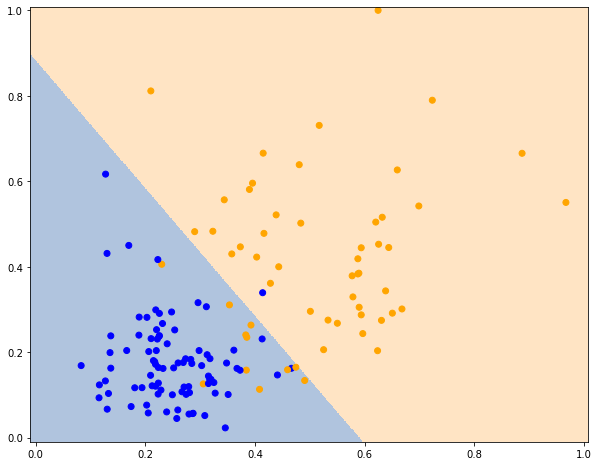

In [13]:
from matplotlib.colors import ListedColormap
cmap_regions = ListedColormap(['bisque', 'lightsteelblue'])
cmap_points = ListedColormap(['orange', 'blue'])
offset = 0.01
step = 0.002
x1_min, x1_max = X[:,0].min() - offset, X[:,0].max() + offset
x2_min, x2_max = X[:,1].min() - offset, X[:,1].max() + offset
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
Z = model_logr.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.figure(figsize=(10,8))
plt.contourf(xx1, xx2, Z, cmap=cmap_regions)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cmap_points)

To show the data points in terms of the color intensity based on the probability.

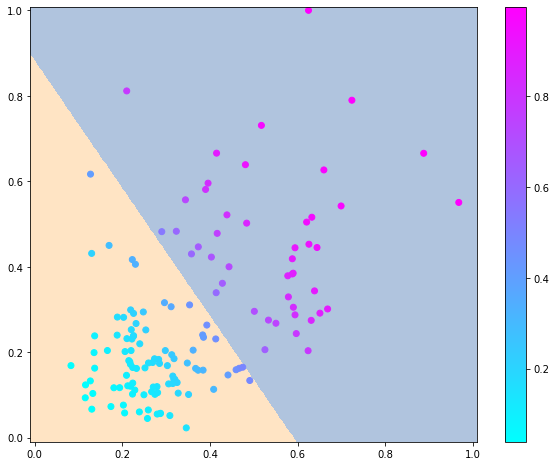

In [14]:
cmap_regions = ListedColormap(['lightsteelblue', 'bisque'])
plt.figure(figsize=(10,8))
plt.contourf(xx1, xx2, Z, cmap=cmap_regions)
plt.scatter(X_test[:,0], X_test[:,1], c=y0_prob, cmap='cool')
plt.colorbar()

### 1.3 Multinomial Logistic Regression

Let's load the iris flower dataset which contains information about three types of flowers:
<ul> <li>Setosa</li>
<li>Versicolor</li>
<li>Virginica </li></ul>
Since there are three classes, we need to build a multinomial Logistic Regression model to classify the dataset.

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [16]:
iris_pd = pd.DataFrame(iris.data)
iris_pd.columns = iris.feature_names
iris_pd['target'] = iris.target
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


As we can see there are 30 columns and 1 target variable.

In [17]:
X = iris_pd.iloc[:,0:4]
y = iris_pd['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

Let's build a multinomial logistic regression classifier. We can build using the same module ```SDGClassifier``` or using ```LogisticRegression``` module. Let's build the model using ```LogisticRegression``` module.

In [18]:
from sklearn.linear_model import LogisticRegression
model_mlogr = LogisticRegression(multi_class='multinomial', max_iter=200)
model_mlogr.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [19]:
y_pred = model_mlogr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9473684210526315
[[14  0  0]
 [ 0  9  1]
 [ 0  1 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [20]:
y_pred_prob = model_mlogr.predict_proba(X_test)
print(y_pred_prob[:5,:])

[[2.38049351e-05 5.51375309e-02 9.44838664e-01]
 [9.68011146e-01 3.19886510e-02 2.03078306e-07]
 [1.35318262e-08 2.24181345e-03 9.97758173e-01]
 [9.83585013e-01 1.64148965e-02 9.00619077e-08]
 [8.73475669e-04 4.45512706e-01 5.53613818e-01]]
